# Notebook for checking latency

In [1]:
# each actor gets there own latency dataframe to check the time of the run step
# concatenate frames together to get total latency for a given frame 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# with spike counts included

In [32]:
gen_df = pd.read_pickle("../latency/generator_acquisition_debug_False_netgear_True_latency.pkl")
processor_df = pd.read_pickle("../latency/processor_acquisition_latency.pkl")

## Generator Latency

In [33]:
x = list(gen_df["frame number"])
y = list(gen_df["latency"])

In [34]:
print(sum(y) / len(y))

2.807835936063939


Text(0.5, 1.0, 'Generator Latency')

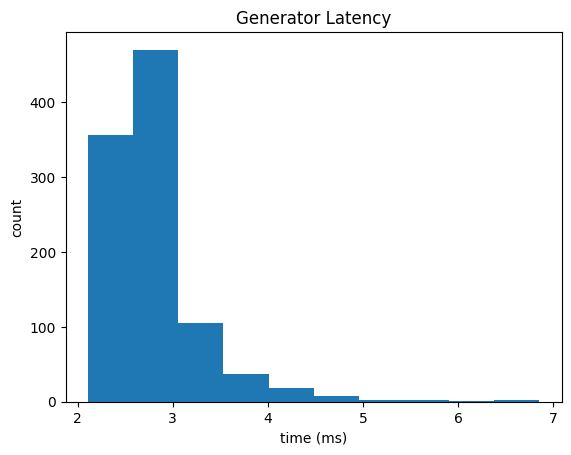

In [35]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Generator Latency")

## Processor Latency

In [36]:
x = list(processor_df["frame number"])
y = list(processor_df["latency"])

In [37]:
print(sum(y) / len(y))

2.4006215208333326


Text(0.5, 1.0, 'Processing Time')

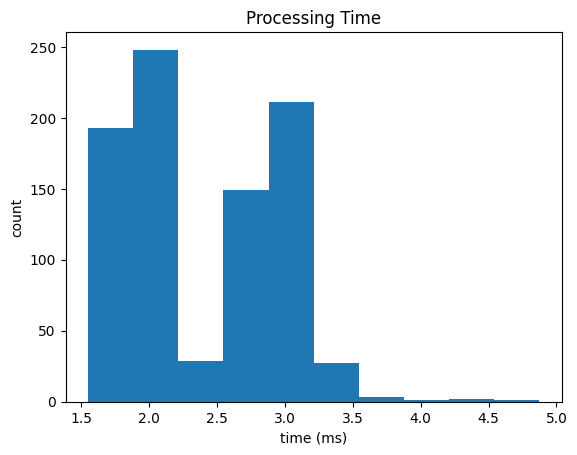

In [38]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Processing Time")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe34483210>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe344852d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe3442b210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe344872d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe34490190>],
 'means': []}

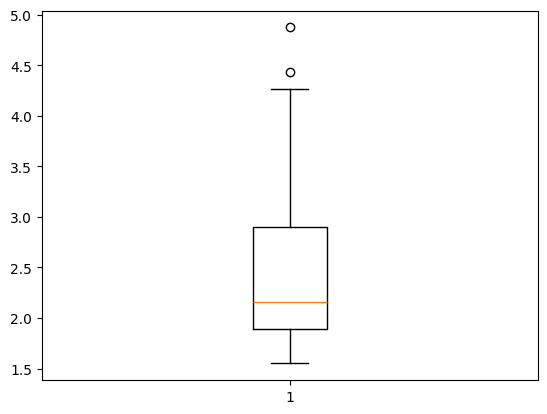

In [39]:
plt.boxplot(np.array(processor_df["latency"]))

## Total Latency

In [40]:
gen_y = list(gen_df["latency"])[27:]

In [41]:
proc_y = list(processor_df["latency"])[27:]

In [42]:
total_latency = [x + y for x, y in zip(gen_y, proc_y)]

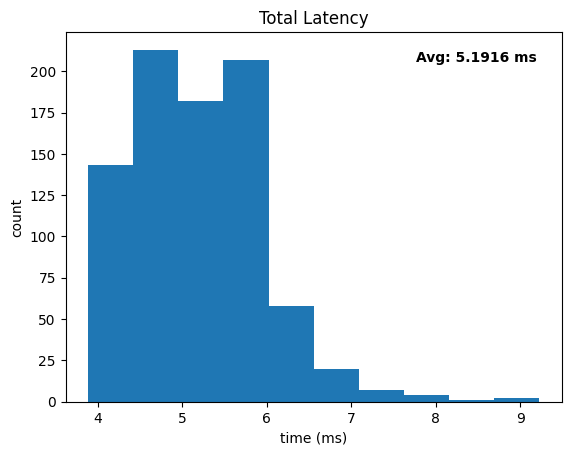

In [43]:
plt.hist(total_latency)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Total Latency")

avg_latency = round(sum(total_latency) / len(total_latency), 4)
ax = plt.gca()
plt.text(0.95, 0.95, f'Avg: {avg_latency} ms', 
         transform=ax.transAxes, 
         ha='right', va='top',
         fontsize=10, fontweight='bold')

plt.show()

In [44]:
sum(total_latency) / len(total_latency)

5.19162111708483